# 1. Implementation of resume screening with python

In [1]:
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def extract_keywords_from_resume(pdf_file_path):
    with open(pdf_file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()

    words = word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    word_freq = Counter(filtered_words)

    num_keywords = 10 
    keywords = [word for word, _ in word_freq.most_common(num_keywords)]

    return keywords

resume_pdf_path = "resume.pdf"
keywords = extract_keywords_from_resume(resume_pdf_path)
print("Keywords extracted from the resume:")
print(keywords)

Keywords extracted from the resume:
['java', 'system', 'l', 'developer', 'r', 'e', 'c', 'n', 'k', 'data']


In [4]:
if 'java' in keywords and 'html' in keywords:
    print("Candidate is accepted for the job.")
else:
    print("Candidate is not accepted for the job.")

Candidate is not accepted for the job.


# 2. Named Entity Recognition

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Apple Inc. is planning to open a new store in San Francisco in September 2022."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple Inc. ORG
San Francisco GPE
September 2022 DATE


# 3. Sentiment Analysis

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
positive_words = ['good', 'great', 'excellent', 'awesome', 'love']
negative_words = ['bad', 'terrible', 'awful', 'hate', 'dislike']

In [8]:
def analyze_sentiment(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    sentiment_score = sum(1 if word in positive_words else -1 if word in negative_words else 0 for word in tokens)
    print(sentiment_score)
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

In [9]:
text = "I love this product! It's super."
sentiment = analyze_sentiment(text)
print(f"Sentiment: {sentiment}")

1
Sentiment: Positive


# 4. Keyword Extraction

In [3]:
!pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from rake_nltk import Rake

rake_class = Rake()

example_text = "Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language."
rake_class.extract_keywords_from_text(example_text)

extracted_keywords = rake_class.get_ranked_phrases()
print(extracted_keywords)

['humans using natural language', 'natural language processing', 'artificial intelligence', 'subfield', 'nlp', 'interaction', 'focuses', 'computers', 'ai']


# 5. Spelling correction

In [8]:
pip install TextBlob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob

In [9]:
def correct_sentence(sentence):
    blob = TextBlob(sentence)
    corrected_sentence = str(blob.correct())
    return corrected_sentence

In [13]:
input_sentence = input("Enter a sentence with misspelled words: ")
corrected_sentence = correct_sentence(input_sentence)
print("Corrected Sentence:", corrected_sentence)

Enter a sentence with misspelled words: her haire longe
Corrected Sentence: her hair long


# 6. Keyboard automation model

In [16]:
from autocorrect import Speller
spell = Speller()

def autocorrect(input_word):
    return spell(input_word)

input_word = input("Enter a word to autocorrect: ")
corrected_word = autocorrect(input_word)
print(f"Input word: {input_word}, Corrected word: {corrected_word}")

Enter a word to autocorrect: corect wordd
Input word: corect wordd, Corrected word: correct world


# 7. Implementation of election results 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [30]:
tweets = [
    ("I hate candidate A", 0),
    ("I love candidate B", 1),
    ("Candidate A is terrible", 0),
    ("I support candidate B", 1),
    ("Can't stand candidate A", 0),
    ("I'm voting for candidate B", 1)
]

In [31]:
df = pd.DataFrame(tweets, columns=['text', 'sentiment'])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [32]:
df['text'] = df['text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf_classifier.predict(X_test_vectorized)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\Harish bhalaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Harish bhalaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Harish bhalaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [36]:
sentiment_df = pd.DataFrame({'text': X_test, 'sentiment': y_test, 'predicted_sentiment': y_pred})

In [37]:
sentiment_df['candidate'] = sentiment_df['text'].apply(lambda x: 'A' if 'candidate a' in x else ('B' if 'candidate b' in x else None))

In [38]:
average_sentiment = sentiment_df.groupby('candidate')['predicted_sentiment'].mean()

In [39]:
winning_candidate = average_sentiment.idxmax()

print(f"Candidate {winning_candidate} has the highest possibility of winning.")

Candidate B has the highest possibility of winning.


# 8. Development of NLP for other language

In [36]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from textblob import TextBlob 

In [37]:
nltk.download('averaged_perceptron_tagger')
text = "hallo du bist karl. ja,ich bin karl."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
for token, pos_tag in pos_tags:
    print(token, pos_tag)
sentiment_score = 0
for sentence in text.split("."):
    analysis = TextBlob(sentence)
    sentiment_score += analysis.sentiment.polarity

print("Sentiment score:", sentiment_score)

hallo NN
du NNS
bist VBP
karl NN
. .
ja NN
, ,
ich JJ
bin NN
karl NN
. .
Sentiment score: 0.0


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gkeer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 9. Creation of text classification using deep learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
texts = ["I love nlp.", "I hate exams.", "nlp is fascinating."]
labels = [1, 0, 1]  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [3]:
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

labels = np.array(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\gkeer\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.6946 - val_accuracy: 1.0000 - val_loss: 0.6903
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5000 - loss: 0.6876 - val_accuracy: 1.0000 - val_loss: 0.6883
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.6819 - val_accuracy: 1.0000 - val_loss: 0.6864
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.6777 - val_accuracy: 1.0000 - val_loss: 0.6853
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.6796 - val_accuracy: 1.0000 - val_loss: 0.6850
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.6781 - val_accuracy: 1.0000 - val_loss: 0.6846
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.6668 - val_accuracy: 1.0000 - val_loss: 0.6840
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.6556 - val_accuracy: 1.0000 - val_loss

# 10. Summarize text with machine learning

In [38]:
import spacy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

In [39]:
nlp = spacy.load("en_core_web_sm")

In [40]:
def extract_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

In [41]:
def generate_summary(text, num_sentences=2):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    
    text = " ".join(sentences)

    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)

    summary_text = " ".join([str(sentence) for sentence in summary])
    return summary_text

In [44]:
file_path = "whatsapp_chat.txt"

In [45]:
document_text = extract_text_from_file(file_path)
summary = generate_summary(document_text)
print(summary)

12/20/2023, 10:15 - John: Hey guys, how's it going? Did you see the latest movie?


# 11. Chatbot for task management

In [54]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
tasks = []

In [57]:
def add_task(task):
    tasks.append(task)
    return "Task added successfully."

def remove_task(task):
    if task in tasks:
        tasks.remove(task)
        return "Task removed successfully."
    else:
        return "Task not found."

In [58]:
def list_tasks():
    if tasks:
        return "\n".join(tasks)
    else:
        return "No tasks found."

In [59]:
def process_input(input_text):
    tokens = word_tokenize(input_text)
    tokens = [word for word in tokens if word.isalnum()]

    if 'add' in tokens:
        task_index = tokens.index('add')
        task = ' '.join(tokens[task_index + 1:])
        return add_task(task)
    elif 'remove' in tokens:
        task_index = tokens.index('remove')
        task = ' '.join(tokens[task_index + 1:])
        return remove_task(task)
    elif 'list' in tokens:
        return list_tasks()
    else:
        return "Sorry, I didn't understand that. Please try again."

In [61]:
def main():
    print("Welcome to Task Management Bot!")
    print("You can add, remove, or list tasks.")

    while True:
        user_input = input("What would you like to do? ")
        if user_input.lower() == 'exit':
            print("Exiting...")
            break
        else:
            response = process_input(user_input)
            print(response)

if __name__ == "__main__":
    main()

Welcome to Task Management Bot!
You can add, remove, or list tasks.
Task added successfully.
Task added successfully.
Task added successfully.
Task removed successfully.
task
task cleaning
task bathing
task cleaning
task bathing
Exiting...


# 12. Chatbot to recommend a gift product

In [62]:
import random

In [63]:
interests_to_gifts = {
    "books": ["Bestseller novel", "Bookstore gift card", "E-book reader"],
    "music": ["Bluetooth headphones", "Vinyl record collection", "Concert tickets"],
    "sports": ["Fitness tracker", "Sportswear", "Tickets to a game"],
    "tech": ["Smartwatch", "Wireless charging pad", "Portable speaker"],
    "cooking": ["Cookbook", "Kitchen gadgets set", "Cooking class voucher"]
}

In [64]:
def recommend_gift(interest):
    if interest.lower() in interests_to_gifts:
        gifts = interests_to_gifts[interest.lower()]
        return random.choice(gifts)
    else:
        return "Sorry, I couldn't find a suitable gift for that interest."

In [66]:
def main():
    print("Welcome to Gift Recommendation Bot!")
    print("Please tell me the recipient's interest, and I'll recommend a gift.")

    while True:
        user_input = input("Recipient's interest: ")
        if user_input.lower() == 'exit':
            print("Exiting...")
            break
        else:
            recommendation = recommend_gift(user_input)
            print("Recommended gift:", recommendation)

if __name__ == "__main__":
    main()

Welcome to Gift Recommendation Bot!
Please tell me the recipient's interest, and I'll recommend a gift.
Recommended gift: Sorry, I couldn't find a suitable gift for that interest.
Recommended gift: Cookbook
Exiting...


13. Whatsapp group chat analysis

In [67]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist


In [68]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
def load_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        chat_lines = file.readlines()
    return chat_lines

In [70]:
def preprocess_chat(chat_lines):
    processed_lines = []
    for line in chat_lines:
        if re.match(r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} - ', line):
            line = line.split(' - ')[1]
            line = re.sub(r'[^a-zA-Z0-9\s]', '', line).lower()
            processed_lines.append(line)
    return processed_lines

In [71]:
def tokenize_and_remove_stopwords(chat_lines):
    stop_words = set(stopwords.words('english'))
    tokenized_words = []
    for line in chat_lines:
        words = word_tokenize(line)
        words = [word for word in words if word not in stop_words]
        tokenized_words.extend(words)
    return tokenized_words

In [72]:
def analyze_common_words(tokenized_words, num_words=10):
    fdist = FreqDist(tokenized_words)
    common_words = fdist.most_common(num_words)
    return common_words

In [73]:
def plot_common_words(common_words):
    words, frequencies = zip(*common_words)
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Common Words in Chat')
    plt.xticks(rotation=45)
    plt.show()

Top 10 Common Words in Chat:
- 'john': 3
- 'hey': 2
- 'mary': 2
- 'david': 2
- 'movie': 2
- 'guys': 1
- 'hows': 1
- 'going': 1
- 'hi': 1
- 'everythings': 1


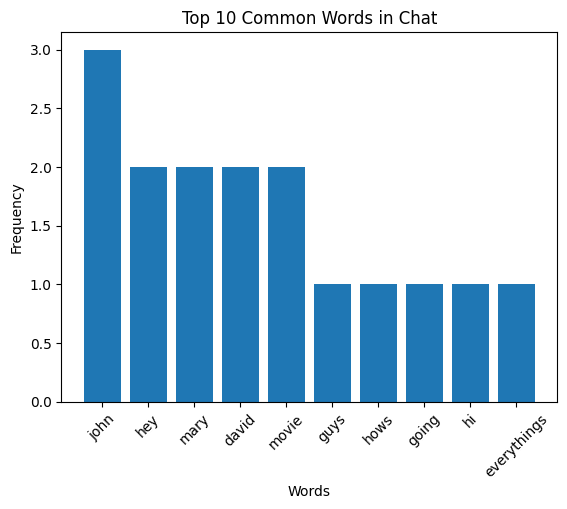

In [74]:
def main():
    input_file = 'whatsapp_chat.txt'  
    chat_data = load_chat_data(input_file)
    processed_lines = preprocess_chat(chat_data)
    tokenized_words = tokenize_and_remove_stopwords(processed_lines)
    common_words = analyze_common_words(tokenized_words)
    print("Top 10 Common Words in Chat:")
    for word, frequency in common_words:
        print(f"- '{word}': {frequency}")
    plot_common_words(common_words)
    
main()

14. Next word prediction model

In [75]:
import nltk
from nltk.corpus import brown
from nltk.util import ngrams
from collections import defaultdict, Counter

In [76]:
def preprocess_data():
    sentences = brown.sents(categories='news')
    words = [word.lower() for sent in sentences for word in sent]
    unigrams = ngrams(words, 1)
    bigrams = ngrams(words, 2)
    trigrams = ngrams(words, 3)
    unigram_counts = Counter(unigrams)
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)
    return unigram_counts, bigram_counts, trigram_counts

In [77]:
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [78]:
def predict_next_word(previous_words, unigram_counts, bigram_counts, trigram_counts):

    n = len(previous_words)
    if n == 0:
        return None

    if n == 2 and tuple(previous_words) in trigram_counts:
        possible_next_words = trigram_counts[tuple(previous_words)]
    elif n == 1 and tuple(previous_words) in bigram_counts:
        possible_next_words = bigram_counts[tuple(previous_words)]
    else:
        possible_next_words = unigram_counts[tuple(previous_words)]

    if isinstance(possible_next_words, int):
        return None

    total_count = sum(possible_next_words.values())
    vocab_size = len(possible_next_words)
    smoothed_counts = defaultdict(int)
    for word, count in possible_next_words.items():
        smoothed_counts[word] = (count + 1) / (total_count + vocab_size)
    next_word = max(smoothed_counts, key=smoothed_counts.get)
    return next_word

In [80]:
def main():
    unigram_counts, bigram_counts, trigram_counts = preprocess_data()
    previous_words = ['it', 'was', 'a', 'good']
    next_word = predict_next_word(previous_words, unigram_counts, bigram_counts, trigram_counts)
    if next_word:
        print(f"The most likely next word after '{' '.join(previous_words)}' is: {next_word}")
    else:
        print(f"Could not predict the next word after '{' '.join(previous_words)}'.")
        print("Try providing a longer context or a different input.")
        
main()

Could not predict the next word after 'it was a good'.
Try providing a longer context or a different input.


15. Fake news detection model

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def prepare_data(data):
    X = data['text']
    y = data['label']
    return X, y

In [83]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def create_pipeline():
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    classifier = MultinomialNB()
    return tfidf_vectorizer, classifier

In [84]:
def train_model(tfidf_vectorizer, classifier, X_train, y_train):
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    classifier.fit(X_train_tfidf, y_train)
    
def predict(tfidf_vectorizer, classifier, X_test):
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_tfidf)
    return y_pred

In [85]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, classification_rep

In [86]:
def main():
    file_path = 'fake_or_real_news.csv'  # Replace with the actual path to your dataset
    data = load_data(file_path)
    X, y = prepare_data(data)
    X_train, X_test, y_train, y_test = split_data(X, y)
    tfidf_vectorizer, classifier = create_pipeline()
    train_model(tfidf_vectorizer, classifier, X_train, y_train)
    y_pred = predict(tfidf_vectorizer, classifier, X_test)
    accuracy, conf_matrix, classification_rep = evaluate_model(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)
    
main()

Accuracy: 0.8453038674033149
Confusion Matrix:
 [[443 185]
 [ 11 628]]
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.98      0.71      0.82       628
        REAL       0.77      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.85      0.84      1267



16. NLP for whatsapp chats

In [87]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [88]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [89]:
def load_whatsapp_chat(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        chat_data = file.read()
    return chat_data

def preprocess_chat_data(chat_data):
    processed_data = ''.join(char for char in chat_data if char.isalnum() or char.isspace())
    return processed_data

In [90]:
def perform_sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [91]:
chat_filepath = 'sample_whatsapp.txt'

In [92]:
chat_data = load_whatsapp_chat(chat_filepath)
preprocessed_data = preprocess_chat_data(chat_data)

chat_sentiment_score = perform_sentiment_analysis(preprocessed_data)

In [93]:
if chat_sentiment_score >= 0.05:
    overall_sentiment = 'Positive'
elif chat_sentiment_score <= -0.05:
    overall_sentiment = 'Negative'
else:
    overall_sentiment = 'Neutral'

In [94]:
print(f'Overall Sentiment: {overall_sentiment} (Sentiment Score: {chat_sentiment_score:.2f})')

Overall Sentiment: Positive (Sentiment Score: 1.00)


Chatbot Building

In [104]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Harish
[nltk_data]     bhalaa\AppData\Roaming\nltk_data...


True

In [98]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import json
import random

In [99]:
lemmatizer = WordNetLemmatizer()

In [100]:
responses = {
    "hello": ["Hello! How can I help you today?", "Hi there! What can I do for you?"],
    "bye": ["Goodbye! Have a great day!", "See you later!"],
    "how are you": ["I'm just a bot, but I'm doing great! How about you?"],
    "name": ["I am a simple chatbot created by an AI enthusiast.", "I don't have a name, but I'm here to help you!"]
}

In [101]:
def preprocess_input(user_input):
    # Tokenize and lemmatize the user input
    tokens = word_tokenize(user_input.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [102]:
def get_response(user_input):
    tokens = preprocess_input(user_input)
    for token in tokens:
        if token in responses:
            return random.choice(responses[token])
    return "I'm sorry, I don't understand that."

In [106]:
print("Chatbot: Hello! I am a simple chatbot. Type 'bye' to exit.")
while True:
    user_input = input("You: ")
    if user_input.lower() in ["bye", "exit", "quit"]:
        print("Chatbot:", random.choice(responses["bye"]))
        break
    response = get_response(user_input)
    print("Chatbot:", response)

Chatbot: Hello! I am a simple chatbot. Type 'bye' to exit.
Chatbot: I'm sorry, I don't understand that.
Chatbot: I am a simple chatbot created by an AI enthusiast.
Chatbot: I'm sorry, I don't understand that.
Chatbot: Hi there! What can I do for you?
Chatbot: See you later!


# exp 1

In [4]:
import re
import string


In [6]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text=text.translate(str.maketrans('','',string.punctuation))
    # Tokenize the text
    tokens = text.split()
    # Remove common stopwords
    stopwords = set(['a', 'an', 'the', 'in', 'on', 'and', 'is', 'are', 'was', 'were'])
    tokens = [token for token in tokens if token not in stopwords]
    # Return the preprocessed text as a string
    return ' '.join(tokens)


In [9]:
def screen_resume(resume, job_requirements):
    # Preprocess the resume
    preprocessed_resume = preprocess_text(resume)
    # Count the number of keyword matches
    keyword_matches = 0
    for keyword in job_requirements:
        if re.search(r'\b{}\b'.format(keyword), preprocessed_resume, re.IGNORECASE):
            keyword_matches += 1
    return keyword_matches

In [13]:
def main():
    job_requirements = ['python', 'machine learning', 'data analysis']
    resumes = ['resume1.txt', 'resume2.txt', 'resume3.txt']
    for resume in resumes:
        with open(resume, 'r') as file:
            resume_text = file.read()
            score = screen_resume(resume_text, job_requirements)
    if score >= 2:
        print(f"{resume} passed the screening with a score of {score}")
if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'resume1.txt'